In [1]:
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import tikzplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_results(cell_name, method):
    pred_communities = np.load(f"../results/{cell_name}/p95/{method}_pred_communities.npy").astype(int)
    with open(
        f"../data/cell-type-specific/{cell_name}-networks/adj/p95/msdyn_nw_details.yaml", "r"
    ) as outfile:
        msdyn_nw_details = yaml.load(outfile, Loader=yaml.SafeLoader)
    
    donor_idx_keys = sorted(msdyn_nw_details["donor_indices"].keys())

    return pred_communities, msdyn_nw_details, donor_idx_keys

In [4]:
comm_cell_dict = {}
msdyn_nw_details_dict = {}
donor_idx_keys_dict = {}

method = "muspces"
cell_names = ["Epen1"]

for cell_name in cell_names:
    comm_cell_dict[cell_name], msdyn_nw_details_dict[cell_name], donor_idx_keys_dict[cell_name] = read_results(cell_name, method)

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

In [6]:
for cell_name in cell_names:
    comm_cell = comm_cell_dict[cell_name]
    msdyn_nw = msdyn_nw_details_dict[cell_name]
    donor_idx = donor_idx_keys_dict[cell_name]
    print(cell_name)
    for day_i, day in enumerate(["D32", "D50"]):
        print(day)
        gene_clusters = []
        for i in range(comm_cell.shape[0]):
            uniq = np.unique(comm_cell[i,day_i,:])
            for c in (uniq):
                gene_clusters.append(list(np.nonzero(comm_cell[i,day_i,:]==c)[0]))
        te = TransactionEncoder()
        te_ary = te.fit(gene_clusters).transform(gene_clusters)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        frequent_itemsets = fpmax(df, min_support=comm_cell.shape[0]*0.624/(len(gene_clusters)), use_colnames=True)
        frequent_itemsets["itemsets"] = frequent_itemsets["itemsets"].apply(list)
        frequent_itemsets.drop(np.nonzero(frequent_itemsets["itemsets"].apply(len).to_numpy()<10)[0], inplace=True)
        frequent_itemsets.to_csv(f"../results/{cell_name}/p95/{method}_frequent_itemsets-{day}.csv", index=False)

Epen1
D32
D50


In [7]:
max(frequent_itemsets["itemsets"].apply(len))

128

In [11]:
frequent_itemsets

,support,itemsets
25,0.10596,"[1793, 1284, 1286, 16, 1042, 156, 1056, 417, 3..."
46,0.10596,"[1488, 38, 1723, 1326]"
63,0.10596,"[362, 1247]"
98,0.10596,"[376, 1273, 812]"
102,0.10596,"[585, 844, 624, 1779, 1269, 1117]"
214,0.10596,"[1401, 1834]"
222,0.10596,"[1393, 1053]"
235,0.10596,"[1380, 1638, 462, 1910, 1753, 379]"
290,0.10596,"[547, 1077]"
293,0.10596,"[1074, 739]"


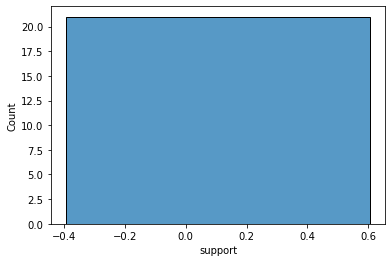

In [12]:
ax = sns.histplot(data=frequent_itemsets["support"])

In [26]:
frequent_itemsets.loc[len_sets==40]["itemsets"]

Series([], Name: itemsets, dtype: object)

In [27]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets.loc[len_sets<15], metric="confidence", min_threshold=0.025, support_only=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(160, 1190, 1491, 118, 1238)",(671),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
1,"(160, 1190, 1491, 118, 671)",(1238),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
2,"(160, 1190, 1491, 1238, 671)",(118),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
3,"(160, 1190, 118, 1238, 671)",(1491),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
4,"(160, 1491, 1238, 118, 671)",(1190),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
188393,(773),"(1018, 724)",NaN,NaN,0.042035,NaN,NaN,NaN,NaN
188394,(649),(708),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
188395,(708),(649),NaN,NaN,0.042035,NaN,NaN,NaN,NaN
188396,(764),(765),NaN,NaN,0.044248,NaN,NaN,NaN,NaN
